## Suggested Answers

Two required data sets:

+ Energy data from Canvas

+ UNSD classification data from Canvas.

Store them in the `data` folder so we can read them in using the standard relative path.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Optional, to ignore FutureWarning messages in Python
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [3]:
# Read in data as df_energy and rename columns
df_energy = pd.read_csv("../data/per-capita-energy-use.csv", header = 0,
                        names = ["Entity", "Code", "Year", "Energy_use"])
# Remove rows with missing country codes
df_energy = df_energy.dropna(subset = ["Code"])
# Remove rows that starts with OWID
df_energy = df_energy[~df_energy["Code"].str.startswith("OWID")]
df_energy.head()

,Entity,Code,Year,Energy_use
0,Afghanistan,AFG,1980,623.92865
1,Afghanistan,AFG,1981,786.83690
2,Afghanistan,AFG,1982,926.65125
3,Afghanistan,AFG,1983,1149.19590
4,Afghanistan,AFG,1984,1121.57290


In [4]:
# 9842 rows and 4 columns
df_energy.shape

(9842, 4)

In [5]:
# 58 unique years
df_energy["Year"].nunique()

58

In [6]:
# Read in data as df_regions
df_regions = pd.read_excel("../data/UNSD — Methodology.xlsx")
# Rename columns
df_regions.columns = ["Region", "Country", "ISO3", "LDC", "LLDC", "SIDS"]
# Replace missing values with 0 and "x" with 1
df_regions["LDC"] = df_regions["LDC"].fillna(0).replace("x", 1)
df_regions["LLDC"] = df_regions["LLDC"].fillna(0).replace("x", 1)
df_regions["SIDS"] = df_regions["SIDS"].fillna(0).replace("x", 1)
df_regions.head()

,Region,Country,ISO3,LDC,LLDC,SIDS
0,Asia,Afghanistan,AFG,1,1,0
1,Europe,Åland Islands,ALA,0,0,0
2,Europe,Albania,ALB,0,0,0
3,Africa,Algeria,DZA,0,0,0
4,Oceania,American Samoa,ASM,0,0,1


In [7]:
# Merge energy data and region data and store as merged_energy
merged_energy = df_energy.merge(df_regions, how = "left", left_on = "Code", right_on = "ISO3")
merged_energy.head()

,Entity,Code,Year,Energy_use,Region,Country,ISO3,LDC,LLDC,SIDS
0,Afghanistan,AFG,1980,623.92865,Asia,Afghanistan,AFG,1.0,1.0,0.0
1,Afghanistan,AFG,1981,786.83690,Asia,Afghanistan,AFG,1.0,1.0,0.0
2,Afghanistan,AFG,1982,926.65125,Asia,Afghanistan,AFG,1.0,1.0,0.0
3,Afghanistan,AFG,1983,1149.19590,Asia,Afghanistan,AFG,1.0,1.0,0.0
4,Afghanistan,AFG,1984,1121.57290,Asia,Afghanistan,AFG,1.0,1.0,0.0


In [8]:
# Check unmatched rows
merged_energy[merged_energy["ISO3"].isna()]["Code"].unique()
# ANT: Former Netherlands Antilles, dissolved in 2010 and thus no longer in UNSD classification
# TWN: Taiwan, not included in UNSD classification

array(['ANT', 'TWN'], dtype=object)

In [9]:
# Remove rows that did not find a match
merged_energy = merged_energy[~merged_energy["Code"].isin(["ANT", "TWN"])]
merged_energy.head()

,Entity,Code,Year,Energy_use,Region,Country,ISO3,LDC,LLDC,SIDS
0,Afghanistan,AFG,1980,623.92865,Asia,Afghanistan,AFG,1.0,1.0,0.0
1,Afghanistan,AFG,1981,786.83690,Asia,Afghanistan,AFG,1.0,1.0,0.0
2,Afghanistan,AFG,1982,926.65125,Asia,Afghanistan,AFG,1.0,1.0,0.0
3,Afghanistan,AFG,1983,1149.19590,Asia,Afghanistan,AFG,1.0,1.0,0.0
4,Afghanistan,AFG,1984,1121.57290,Asia,Afghanistan,AFG,1.0,1.0,0.0


In [10]:
# Let's try to merge on country names instead
# Merge energy data and region data and store as merged_energy
merged_energy1 = df_energy.merge(df_regions, how = "left", left_on = "Entity", right_on = "Country")
merged_energy1.head()

,Entity,Code,Year,Energy_use,Region,Country,ISO3,LDC,LLDC,SIDS
0,Afghanistan,AFG,1980,623.92865,Asia,Afghanistan,AFG,1.0,1.0,0.0
1,Afghanistan,AFG,1981,786.83690,Asia,Afghanistan,AFG,1.0,1.0,0.0
2,Afghanistan,AFG,1982,926.65125,Asia,Afghanistan,AFG,1.0,1.0,0.0
3,Afghanistan,AFG,1983,1149.19590,Asia,Afghanistan,AFG,1.0,1.0,0.0
4,Afghanistan,AFG,1984,1121.57290,Asia,Afghanistan,AFG,1.0,1.0,0.0


In [11]:
# Check unmatched rows
merged_energy1[merged_energy1["Country"].isna()]["Entity"].unique()
# Country names are not exactly the same across the two tables, which leads to more unmatched rows.
# Further cleaning is needed before merging tables by country names.

array(['Bolivia', 'Brunei', 'Cape Verde', 'Democratic Republic of Congo',
       'East Timor', 'Eswatini', 'Falkland Islands', 'Hong Kong', 'Iran',
       'Laos', 'Macao', 'Micronesia (country)', 'Moldova',
       'Netherlands Antilles', 'North Korea', 'North Macedonia',
       'Palestine', 'Reunion', 'Russia', 'South Korea', 'Syria', 'Taiwan',
       'Tanzania', 'United Kingdom', 'United States',
       'United States Virgin Islands', 'Venezuela', 'Vietnam'],
      dtype=object)

In [12]:
# 9771 rows and 10 columns
merged_energy.shape

(9771, 10)

In [13]:
# 215 unique countries/area
merged_energy["Entity"].nunique()

215

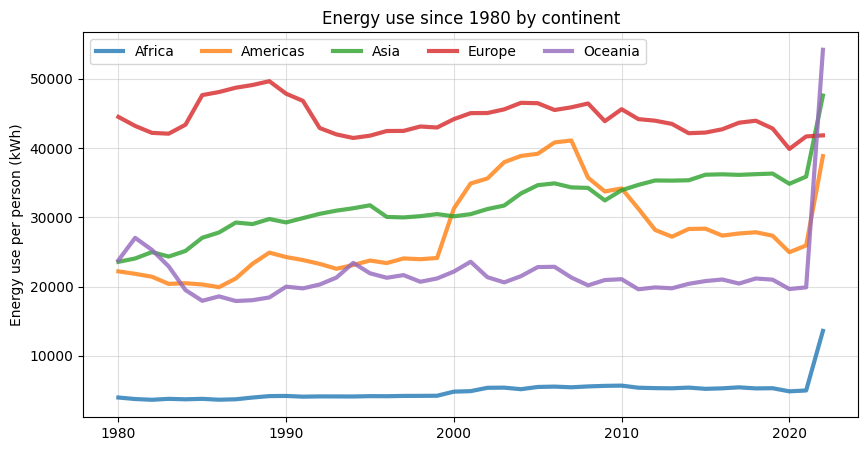

In [14]:
# Line: Energy use since 2000 by continent
df = merged_energy.groupby(["Region", "Year"])[["Energy_use"]].agg("mean").reset_index()
df = df.query("Year >= 1980").copy()
plt.figure(figsize=(10, 5))
for x in df["Region"].unique():
    subset = df[df["Region"] == x]
    plt.plot(subset["Year"], subset["Energy_use"], label = x, linewidth = 3, alpha = 0.8)
plt.title("Energy use since 1980 by continent")
plt.xlabel("")
plt.ylabel("Energy use per person (kWh)")
plt.legend(ncol = 5)
plt.grid(True, alpha = 0.4)
plt.show()

In [15]:
# Prepare data for box plots
df_boxplot = merged_energy.query("Year == 2020").copy()
df_boxplot = df_boxplot[["Energy_use", "Region"]].copy()
df_boxplot = df_boxplot.groupby("Region")["Energy_use"].apply(list)

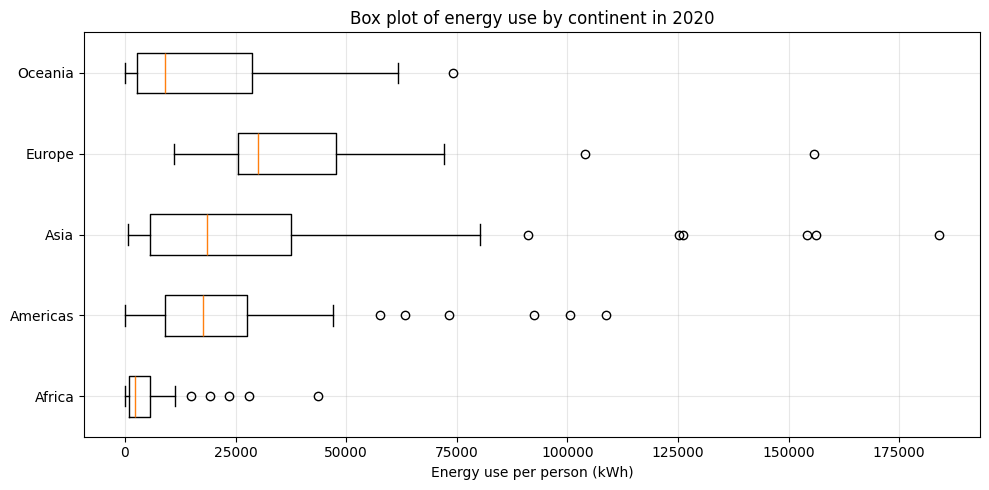

In [16]:
# Box plots
plt.figure(figsize=(10, 5))
plt.boxplot(df_boxplot, tick_labels = df_boxplot.index, vert = False)
# Add plot title and labels
plt.title("Box plot of energy use by continent in 2020")
plt.xlabel("Energy use per person (kWh)")
plt.grid(True, alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
# Compute percentage change from 2021 to 2022
df_2122 = merged_energy[merged_energy["Year"].isin([2021, 2022])]
df_pivot = df_2122.pivot(index = ["Entity", "Code", "Region"],
                         columns = "Year", values = "Energy_use").reset_index()
df_pivot.columns.name = None
df_pivot.dropna(inplace = True)
df_pivot.head()

,Entity,Code,Region,2021,2022
2,Algeria,DZA,Africa,15914.461,15252.127
6,Argentina,ARG,Americas,21328.186,21994.422
9,Australia,AUS,Oceania,61439.910,63458.840
10,Austria,AUT,Europe,45241.050,42685.380
11,Azerbaijan,AZE,Asia,18974.334,18747.918


In [18]:
# Ranking by region
df_pivot.columns = ["Entity", "Code", "Region", "energy_2021", "energy_2022"]
df_pivot["perc_change"] = (df_pivot["energy_2022"] - df_pivot["energy_2021"])/df_pivot["energy_2021"]*100
df_pivot = df_pivot.sort_values(["Region", "perc_change"], ascending = [True, False])
df_pivot

,Entity,Code,Region,energy_2021,energy_2022,perc_change
57,Egypt,EGY,Africa,9639.1200,9960.0625,3.329583
2,Algeria,DZA,Africa,15914.4610,15252.1270,-4.161837
179,South Africa,ZAF,Africa,23392.4240,22350.8980,-4.452407
129,Morocco,MAR,Africa,7236.7104,6855.1104,-5.273114
123,Mexico,MEX,Americas,17515.2050,19009.1860,8.529623
...,...,...,...,...,...,...
112,Luxembourg,LUX,Europe,67687.9100,60334.3300,-10.863949
68,France,FRA,Europe,40464.4650,36051.7930,-10.905055
201,Ukraine,UKR,Europe,21459.9450,16309.1240,-24.002023
9,Australia,AUS,Oceania,61439.9100,63458.8400,3.286024


In [19]:
# Top 1 country in each region
df_top_countries = df_pivot.groupby("Region").head(1).reset_index(drop=True)
df_top_countries = df_top_countries[["Entity", "Code", "Region", "perc_change"]].copy()
df_top_countries

,Entity,Code,Region,perc_change
0,Egypt,EGY,Africa,3.329583
1,Mexico,MEX,Americas,8.529623
2,Indonesia,IDN,Asia,25.186117
3,Bulgaria,BGR,Europe,6.080122
4,Australia,AUS,Oceania,3.286024


In [20]:
# Top 5 and bottom 5 countries in the world
df_pivot = df_pivot.sort_values(["perc_change"], ascending = False)
df_largest_change = pd.concat([df_pivot.head(5), df_pivot.tail(5)]).reset_index(drop = True)
df_largest_change

,Entity,Code,Region,energy_2021,energy_2022,perc_change
0,Indonesia,IDN,Asia,7871.8433,9854.455,25.186117
1,Mexico,MEX,Americas,17515.2050,19009.186,8.529623
2,Iraq,IRQ,Asia,13267.2780,14392.053,8.477813
3,United Arab Emirates,ARE,Asia,139828.7700,148576.550,6.256066
4,Bulgaria,BGR,Europe,32216.7050,34175.520,6.080122
5,Hong Kong,HKG,Asia,32466.9730,29152.305,-10.209353
6,Luxembourg,LUX,Europe,67687.9100,60334.330,-10.863949
7,France,FRA,Europe,40464.4650,36051.793,-10.905055
8,Sri Lanka,LKA,Asia,4884.5293,4347.636,-10.991710
9,Ukraine,UKR,Europe,21459.9450,16309.124,-24.002023


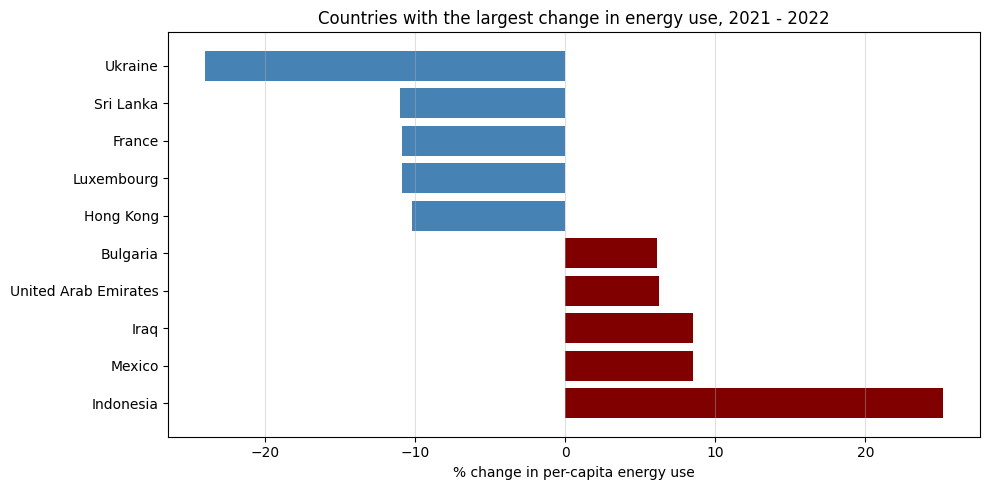

In [21]:
# Visualization
plt.figure(figsize=(10, 5))
plt.barh(df_largest_change["Entity"], df_largest_change["perc_change"], 
        color = ["maroon" if val > 0 else "steelblue" for val in df_largest_change["perc_change"]])

# Add title and labels
plt.title("Countries with the largest change in energy use, 2021 - 2022")
#plt.ylabel("Country")
plt.xlabel("% change in per-capita energy use")
plt.grid(True, axis = "x", alpha = 0.4)

# Show the plot
plt.tight_layout()
plt.show()